In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd

# Reading data

In [3]:
def read_fnames(fname):
    with open(fname) as f:
        fnames = [l.strip() for l in f.readlines()]
        
    return fnames

cell_id = lambda f: int(os.path.basename(f).split(".")[0])
cell_ids = list(map(cell_id, read_fnames("aux_data/180928_cells.csv")))

In [4]:
INF_DIR = "/usr/people/nturner/seungmount/research/nick_and_sven/models_nick/p100_dend_outer/inference"

In [5]:
# Features
def read_features(fname):
    assert os.path.isfile(fname)
    with h5py.File(fname) as f:
        return f["features"].value

In [6]:
fs_list = list(read_features(f"{INF_DIR}/{i}_pca_features.h5") for i in cell_ids)

In [7]:
fs = np.vstack(fs_list)

In [8]:
# Qualitative observations
notes_df = pd.read_csv("aux_data/180930_dendrite_notes.csv", index_col=0)
notes_df.head()

,spiny (1-5),major axis x (basal),major axis y (apical),major axis z (basal),length (1-5),soma,branched
546254140358,3,1,0,1,3,0,0
1067765194641,4,0,0,1,1,0,0
2309937727136,4,1,0,1,1,0,0
442151416423,2,0,1,0,1,0,0
1993494634805,3,1,0,1,1,0,0


# Plotting

In [9]:
cm = plt.get_cmap('tab10')
colors = [cm(.05 + .1 * i) for i in range(10)]

In [10]:
def plot_variable(xy, labels=None, x_label="PC 1", y_label="PC 2"):
    
    if labels is None:
        labels = np.ones((xy.shape[0],), dtype=np.uint8)
    
    u_labels = np.unique(labels)
    
    plt.figure(figsize=(10,10))
    
    for i_label, u_label in enumerate(u_labels):
        l = labels == u_label
        plt.scatter(xy[l,0], xy[l,1], alpha=0.7, c=colors[i_label])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [11]:
obs_inds = [cell_ids.index(i) for i in notes_df.index]

In [12]:
def make_labels(col, inds, total_n=300):
    label_col = np.zeros((total_n,), dtype=np.uint8)
    
    label_col[inds] = col + 1
    return label_col

In [13]:
make_labels(notes_df["spiny (1-5)"], obs_inds, total_n=50)

array([4, 5, 5, 3, 4, 2, 5, 6, 6, 2, 5, 5, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5,
       4, 5, 5, 4, 5, 3, 2, 4, 5, 5, 5, 5, 5, 4, 4, 6, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

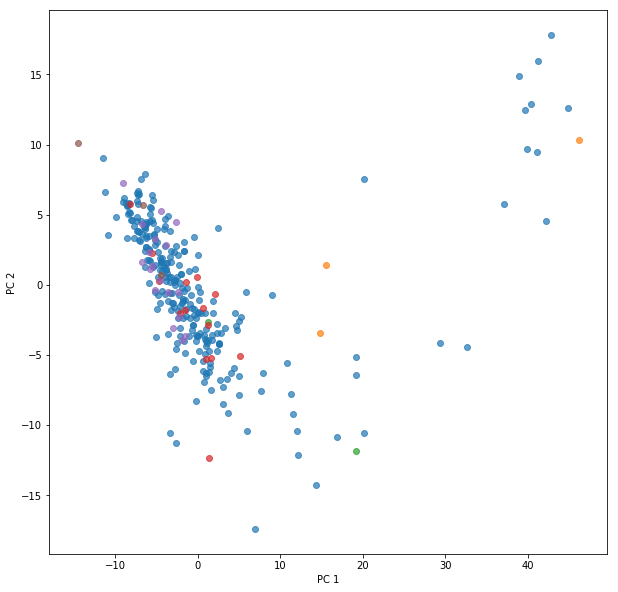

In [14]:
lbls = make_labels(notes_df["spiny (1-5)"], obs_inds)
plot_variable(fs[:,:2], lbls)

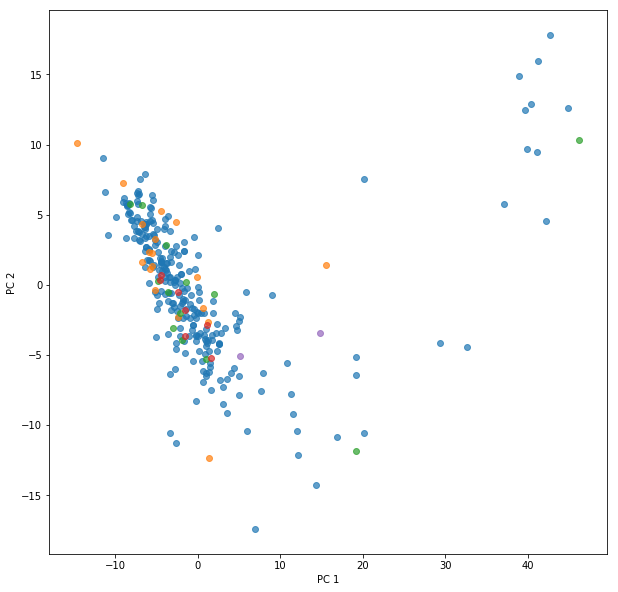

In [16]:
lbls = make_labels(notes_df["length (1-5)"], obs_inds)
plot_variable(fs[:,:2], lbls)

In [17]:
notes_df.basal = notes_df["major axis x (basal)"] | notes_df["major axis z (basal)"]

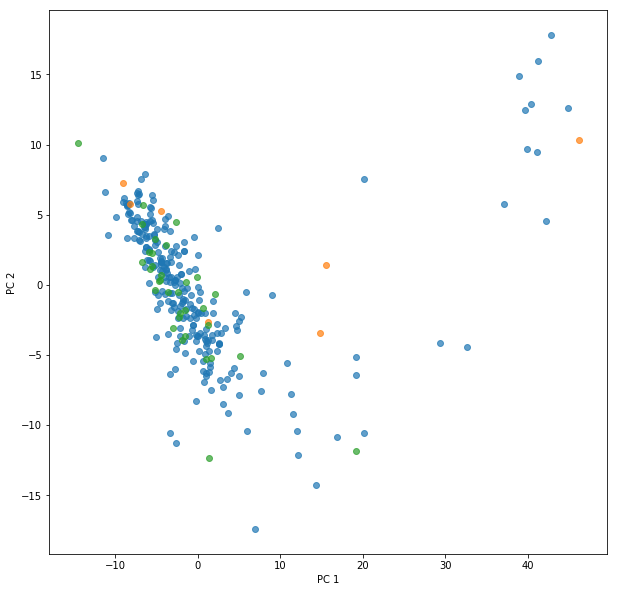

In [18]:
lbls = make_labels(notes_df.basal, obs_inds)
plot_variable(fs[:,:2], lbls)

# Try going the other way - pick meshes with extreme values and visualize

In [19]:
pc1_argsort = np.argsort(fs[:,0])
pc2_argsort = np.argsort(fs[:,1])
pc3_argsort = np.argsort(fs[:,2])
pc4_argsort = np.argsort(fs[:,3])

In [20]:
ids = np.array(cell_ids)

# PC1

In [21]:
ids[pc1_argsort[:20]]

array([ 448925138076,  269597616625,  441224354660, 2309652772095,
       1551699939093,  752534784893,  967441775321,  558233397445,
       2116492815829,  281648410420, 1698727001038, 2093176360272,
        323289123854,  843516869057, 2083265112991, 1609669263603,
       1882261172731,  769504296687, 2104014130576,  425323983624])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc1_argsort[:20]])

Spiny dendrites

![low_pc1](aux_data/180930_low_pc1.png)

In [22]:
ids[pc1_argsort[-20:]]

array([2249686519243, 1540933649265,  270025119991,  669465742415,
        336408415952,  858918364744, 2050109371260, 1432409839258,
       1260284077520, 2053602814850, 1422356149674, 1865647743079,
        830753853151,  264606674078, 1962477417680, 1390839923940,
       2269223814413,  520371009229, 1315971785804, 1148623049896])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc1_argsort[-20:]])

Aspiny dendrites

![high_pc1](aux_data/180930_high_pc1.png)

# PC2

In [23]:
ids[pc2_argsort[:20]]

array([ 929864795105, 1431269112461,  528856312358, 1164309989498,
        336408415952,  858490394357, 1540933649265, 1270979254669,
       2050109371260, 1999341607293, 1366668324704,  447427860611,
       1665856645165, 2299384927495, 1102846826102,  839737768985,
       1863152105973,  448782221841,  689858677393, 1153828213492])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc2_argsort[:20]])

![low_pc2](aux_data/180930_low_pc2.png)

Not many cells were ESPECIALLY high in PC2, so I think plotting 20 was a bit messy - plotting 10 showed a cleaner pattern

In [26]:
ids[pc2_argsort[-10:]]

array([1962477417680,  830753853151,  448925138076, 1148623049896,
       1865647743079, 1315971785804,  264606674078, 1422356149674,
       1390839923940,  520371009229])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc2_argsort[-10:]])

VERY smooth

![high_pc2](aux_data/180930_high_pc2.png)

# PC3

20 was also a bit messy here, going with 10

In [31]:
ids[pc3_argsort[:10]]

array([2221664520293, 1682470727395,  669465742415, 2249686519243,
       1771955631458,  771072751083, 1432409839258,  270025119991,
        693994063106,  282075880333])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc3_argsort[:20]])

Longer dendrites?

![low_pc3](aux_data/180930_low_pc3.png)

In [32]:
ids[pc3_argsort[-10:]]

array([ 448925138076, 1260284077520,  441224354660, 1551699939093,
       1999055796846, 1102846826102,  929864795105,  755030048524,
        404146549448,  678164989339])

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(ids[pc3_argsort[-20:]])

Shorter dendrites?

![high_pc3](aux_data/180930_high_pc3.png)

# PC4

Looks very similar to PC3

In [36]:
ids[pc4_argsort[:10]]

array([ 929864795105,  681302138557,  858490394357, 1270979254669,
       1971319010278,  689858677393, 1062417406634, 2083265112991,
       1048228180735, 1719833087852])

![high_pc3](aux_data/180930_low_pc3.png)

In [35]:
ids[pc4_argsort[-10:]]

array([ 279580226448, 2221664520293, 1682470727395,  665615555955,
       1670847439038, 2047542457524, 1095930199198, 2249686519243,
       1999055796846,  678164989339])

![high_pc3](aux_data/180930_high_pc3.png)